## MAR and MNAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataload import *

import statsmodels.nonparametric.api as nparam
from statsmodels.nonparametric.kernel_regression import KernelReg
#from sklearn.model_selection import train_test_split

In [2]:
n = 1000
p = 0.75
a=1
b=1

In [3]:
df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])
df_reg = df.copy()

In [4]:
df_reg['Y'] = dataset(n,p,df_reg).h_df(a,b)

[1000, 0.24, 0.21, 0.17]
['sample', '$\textup{MSE} \\left\\{m_n \\left($X_1$\right) \right\\}$', '$\textup{MSE} \\left\\{m_n \\left($X_2$\right) \right\\}$', '$\textup{MSE} \\left\\{m_n \\left($X_3$\right) \right\\}$']


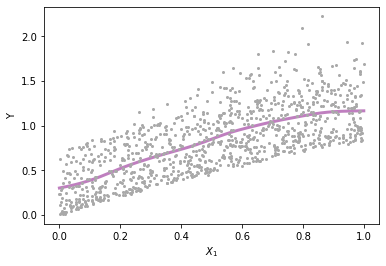

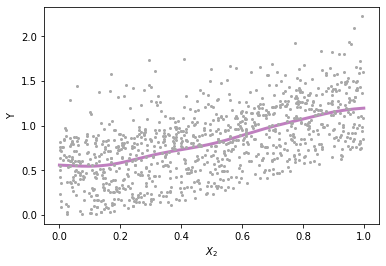

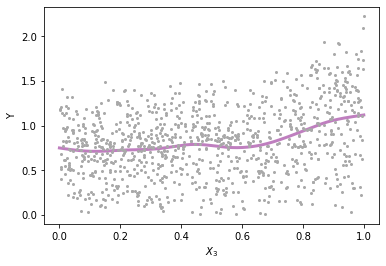

In [5]:
hsample_mse= [len(df_reg)]
col1 = ['sample']

for x in ['X1','X2','X3']:
    col1.append('$\textup{MSE} \left\{m_n \left('+f'${x[0]}_{x[1:]}$'+'\right) \right\}$')
    X_pred = np.linspace(0, 1, n)
    model= KernelReg(endog=[df_reg['Y'].to_numpy()],exog=[df_reg[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred, _ = model.fit(X_pred)
    hsample_mse.append(round(np.mean((Y_pred-df_reg['Y'])**2),2))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred, alpha=0.5,lw=3,c='purple')
    ax.plot(df[x],df_reg['Y'],'o',c='darkgrey',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing predictor mcar/H-Sample regression part '+str(x)+' in predictor.pdf',transparent=True,bbox_inches='tight')

print(hsample_mse)
print(col1)

mse_table = {'MSE / $\pi $':col1, 'H-Sample':hsample_mse}

tab1 = pd.DataFrame(mse_table)

### Missing values in the response $Y$

In [6]:
cc_mse = []

#### MCAR Missing values in the response $Y$

In [7]:
df_ymcar = df.copy()
df_ymcar['Y'] = dataset(n,p,df_reg).h_df(a,b)

In [8]:
omega = (np.random.binomial(size=(n,1), n=1, p= p) == 1)
omega = np.reshape(omega,(n,))
condition = omega 

#df_ymcar = df.copy()
df_ymcar['Y'] = np.where(condition,np.array(df_ymcar['Y']),np.nan)
df_ymcar = df_ymcar.dropna()

[775, 0.25594827598173364, 0.21805435939453924, 0.1756811516967558]


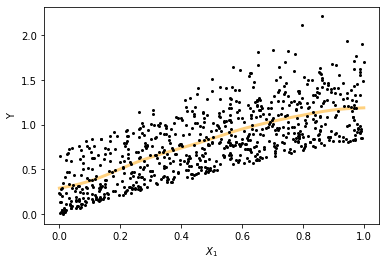

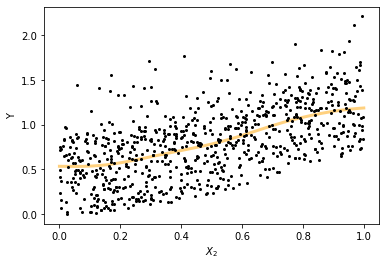

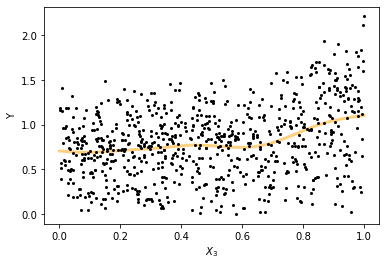

In [14]:
mcar_list = [len(df_ymcar)]
for x in ['X1','X2','X3']:
    X_pred = np.linspace(0, 1, len(df_ymcar))
    model_ymcar= KernelReg(endog=[df_ymcar['Y'].to_numpy()],exog=[df_ymcar[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred_mcar, _ = model_ymcar.fit(X_pred)
    mcar_list.append(np.mean((Y_pred_mcar-df_ymcar['Y'])**2))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred_mcar, alpha=0.5,lw=3,c='orange')
    ax.plot(df_ymcar[x],df_ymcar['Y'],'o',c='black',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/mcar/CC MCAR regression part '+str(x)+' in response.pdf',transparent=True,bbox_inches='tight')
print(mcar_list)

### MAR Missing values in the response $Y$

In [15]:
cond_mar = np.where((df['X1'] <0.5) , 0, 1)
omega = (np.random.binomial(size=(n,1), n=1, p= p) == 1)
omega = np.reshape(omega,(n,))
condition = (omega & (cond_mar==1)) | (cond_mar==0)

In [16]:
df_ymar = df.copy()
df_ymar['Y'] = dataset(n,p,df_ymar).h_df(a,b)

df_ymar['Y'] = np.where(condition,np.array(df_ymar['Y']),np.nan)
df_ymar = df_ymar.dropna()

[863, 0.24432894361848592, 0.20842457534974054, 0.16315102762537606]

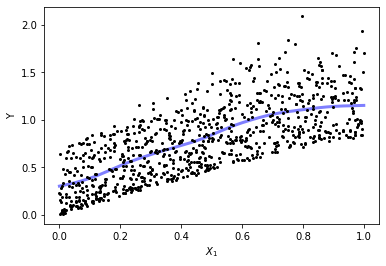

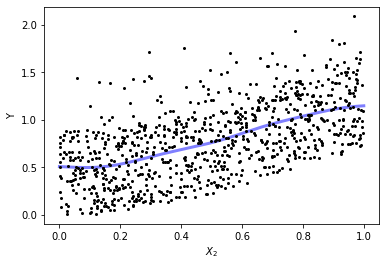

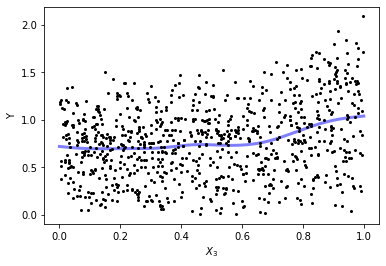

In [17]:
mar_list = [len(df_ymar)]


for x in ['X1','X2','X3']:
    X_pred = np.linspace(0, 1, len(df_ymar))
    model_ymar= KernelReg(endog=[df_ymar['Y'].to_numpy()],exog=[df_ymar[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred_mar, _ = model_ymar.fit(X_pred)
    mar_list.append(np.mean((Y_pred_mar-df_ymar['Y'])**2))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred_mar, alpha=0.5,lw=3,c='blue')
    ax.plot(df_ymar[x],df_ymar['Y'],'o',c='black',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/mar/CC MAR regression part '+str(x)+' in response.pdf',transparent=True,bbox_inches='tight')

mar_list

### MNAR Missing values in the response $Y$

In [13]:
df_ymnar = df.copy()
df_ymnar['Y'] = dataset(n,p,df_ymnar).h_df(a,b)


In [14]:
cond_mnar = np.where((df_ymnar['Y'] <1) , 0, 1)
omega = (np.random.binomial(size=(n,1), n=1, p= p) == 1)
omega = np.reshape(omega,(n,))
condition = (omega & (cond_mnar==1)) | (cond_mnar==0)

In [15]:


df_ymnar['Y'] = np.where(condition,np.array(df_ymnar['Y']),np.nan)

df_ymnar = df_ymnar.dropna()

In [16]:
mnar_list = [len(df_ymnar)]

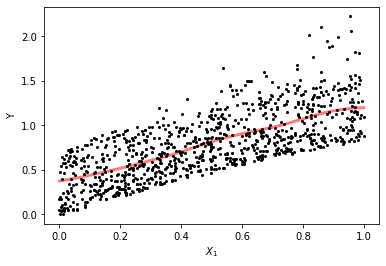

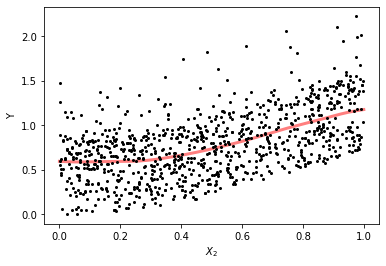

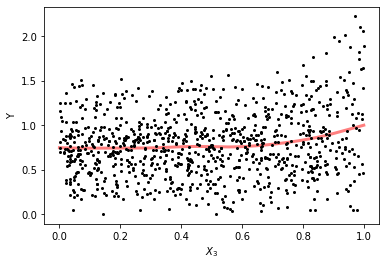

In [17]:
for x in ['X1','X2','X3']:
    X_pred = np.linspace(0, 1, len(df_ymnar))
    model_ymnar= KernelReg(endog=[df_ymnar['Y'].to_numpy()],exog=[df_ymnar[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred_mnar, _ = model_ymnar.fit(X_pred)
    mnar_list.append(np.mean((Y_pred_mnar-df_ymnar['Y'])**2))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred_mnar, alpha=0.5,lw=3,c='red')
    ax.plot(df_ymnar[x],df_ymnar['Y'],'o',c='black',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/mnar/CC MNAR regression part '+str(x)+' in response.pdf',transparent=True,bbox_inches='tight')
    

In [18]:
mnar_list 

[925, 0.21136746804678355, 0.18172713122162198, 0.14329424828922796]

In [19]:
mse_table = {'MSE / $\pi $':col1, 'H-Sample':hsample_mse}
tab1 = pd.DataFrame(mse_table)

In [20]:
a = dict(zip(['MCAR','MAR','MNAR'],[mcar_list,mar_list,mnar_list]))

In [21]:
tab2 = pd.DataFrame(a)

full = pd.concat([tab1,tab2],axis=1)



In [22]:
full

,MSE / $\pi $,H-Sample,MCAR,MAR,MNAR
0,sample,1000.00,752.000000,886.000000,925.000000
1,$\textup{MSE} \left\{m_n \left($X_1$\right) \r...,0.22,0.234494,0.220324,0.211367
2,$\textup{MSE} \left\{m_n \left($X_2$\right) \r...,0.19,0.203454,0.188636,0.181727
3,$\textup{MSE} \left\{m_n \left($X_3$\right) \r...,0.15,0.154478,0.148412,0.143294


In [23]:
print(full.to_latex(index=False,float_format="{:.2f}".format))


\begin{tabular}{lrrrr}
\toprule
                                      MSE / \$\textbackslash pi \$ &  H-Sample &   MCAR &    MAR &   MNAR \\
\midrule
                                            sample &   1000.00 & 752.00 & 886.00 & 925.00 \\
 \$\textbackslash textup\{MSE\} \textbackslash left\textbackslash \{m\_n \textbackslash left(\$X\_1\$\textbackslash right) \textbackslash r... &      0.22 &   0.23 &   0.22 &   0.21 \\
 \$\textbackslash textup\{MSE\} \textbackslash left\textbackslash \{m\_n \textbackslash left(\$X\_2\$\textbackslash right) \textbackslash r... &      0.19 &   0.20 &   0.19 &   0.18 \\
 \$\textbackslash textup\{MSE\} \textbackslash left\textbackslash \{m\_n \textbackslash left(\$X\_3\$\textbackslash right) \textbackslash r... &      0.15 &   0.15 &   0.15 &   0.14 \\
\bottomrule
\end{tabular}

